<a href="https://colab.research.google.com/github/suhyeon03/DeepLearning/blob/main/5_DeZero%EC%9D%98_%EB%8F%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# step 53

모델 저장 및 읽어오기

* 이번 단계에서는 모델이 가지는 매개변수를 외부 파일로 저장하고 다시 읽어오는 기능을 만든다.
* 이런 기능이 있다면 학습 중인 모델의 '스냅샷'을 저장하거나 이미 학습된 매개변수를 읽어와서 추론만 수행할 수 있다.
* DeZero의 매개변수는 Parameter 클래스로 구현되어 있다. (Varaible 클래스를 상속한 클래이이다.)
* 그리고 Parameter의 데이터는 인스턴스 변수 data에 ndarray 인스턴스로 보관된다.
* 따라서 우리가 할 일은 ndarray 인스턴스를 외부 파일로 저장하는 것이다.
* 다행이 넘파이에는 ndarray를 파일로 저장하고 읽어오는 함수가 몇 개 준비되어 있으니 먼저 이 함수들의 사용법을 알아보자.



* DeZero를 GPU에서 실행하는 경우에는 넘파이의 ndarray 대신 쿠파이의 ndarray를 사용한다.
* 이럴 때는 쿠파이 텐서를 넘파이 텐서로 변환한 후 외부 파일로 저장하면 된다.

In [6]:
!git clone https://github.com/GoGiants1/dl-from-scratch-3.git
import sys
sys.path.append('dl-from-scratch-3')



Cloning into 'dl-from-scratch-3'...
remote: Enumerating objects: 2327, done.
remote: Counting objects: 100% (2327/2327), done.
remote: Compressing objects: 100% (852/852), done.
remote: Total 2327 (delta 1503), reused 2287 (delta 1463), pack-reused 0 (from 0)
Receiving objects: 100% (2327/2327), 33.93 MiB | 26.85 MiB/s, done.
Resolving deltas: 100% (1503/1503), done.


넘파이의 save 함수와 load 함수

* 넘파이에는 np.save와 np.load라는 함수가 있다.

In [4]:
import numpy as np

x = np.array([1, 2, 3])
np.save('test.npy', x)

x = np.load('test.npy')
print(x)

[1 2 3]


* np.save 함수부터 봐보자.
* 이 함수는 ndarray 인스턴스를 외부 파일로 저장해준다.
* 이미 저장되어 있는 데이터를 읽어올 때는 np.load 함수를 사용한다.
* 이것으로 하나의 ndarray 인스턴스를 저장하고 읽어올 수 있음을 확인했다.

* 앞의 코드에서 데이터를 test.npy라는 파일로 저장했다. 이 예시처럼 확장자는 .npy로 해주는 게 좋다. 만약 확장자를 생략하면 자동으로 .npy가 뒤에 추가된다.

* 이어서 여러 개의 ndarray 인스턴스를 저장하고 읽어오는 방법을 살펴보자.

In [6]:
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])

np.savez('test.npz', x1=x1, x2=x2)

arrays = np.load('test.npz')
x1 = arrays['x1']
x2 = arrays['x2']
print(x1)
print(x2)


[1 2 3]
[4 5 6]


* 이때 x1=x1, x2=x2처럼 '키워드 인수'를 지정할 수 있다.
* 이렇게 해두면 데이터를 읽을 때 arrays['x1'], arrays['x2']처럼 원하는 키워드를 명시하여 해당 데이터만 꺼내올 수 있다.
* 그리고 np.savez 함수로 저장하는 파일의 확장자는 .npz로 해준다.

In [7]:
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])
data = {'x1':x1, 'x2':x2} # 키워드를 파이썬 딕셔너리로 묶음

np.savez('test.npz', **data)

arrays = np.load('test.npz')
x1 = arrays['x1']
x2 = arrays['x2']
print(x1)
print(x2)

[1 2 3]
[4 5 6]


* 이와 같이 np.savez('test.npz', **data) 코드로 데이터를 저장할 수 있다.
* 이 코드에서처럼 딕셔너리 타입의 인수를 전달할 때 **data와 같이 앞에 별표 두 개를 붙여주면 딕셔너리가 자동으로 전개되어 전달된다.
* 이어서 방금 설명한 함수들을 이용하여 DeZero 매개변수를 외부 파일로 저장하는 기능을 만든다.
* Layer 클래스 안의 Parameter를 '평탄화'하여 꺼낸다.


Layer 클래스의 매개변수를 평평하게

In [ ]:
layer = Layer()

l1 = Layer()
l1.p1 = Parameter(np.array(1))

layer.l1 = l1
layer.p2 = Parameter(np.array(2))
layer.p3 = Parameter(np.array(3))

* layer에 또 다른 계층인 l1을 넣었다.

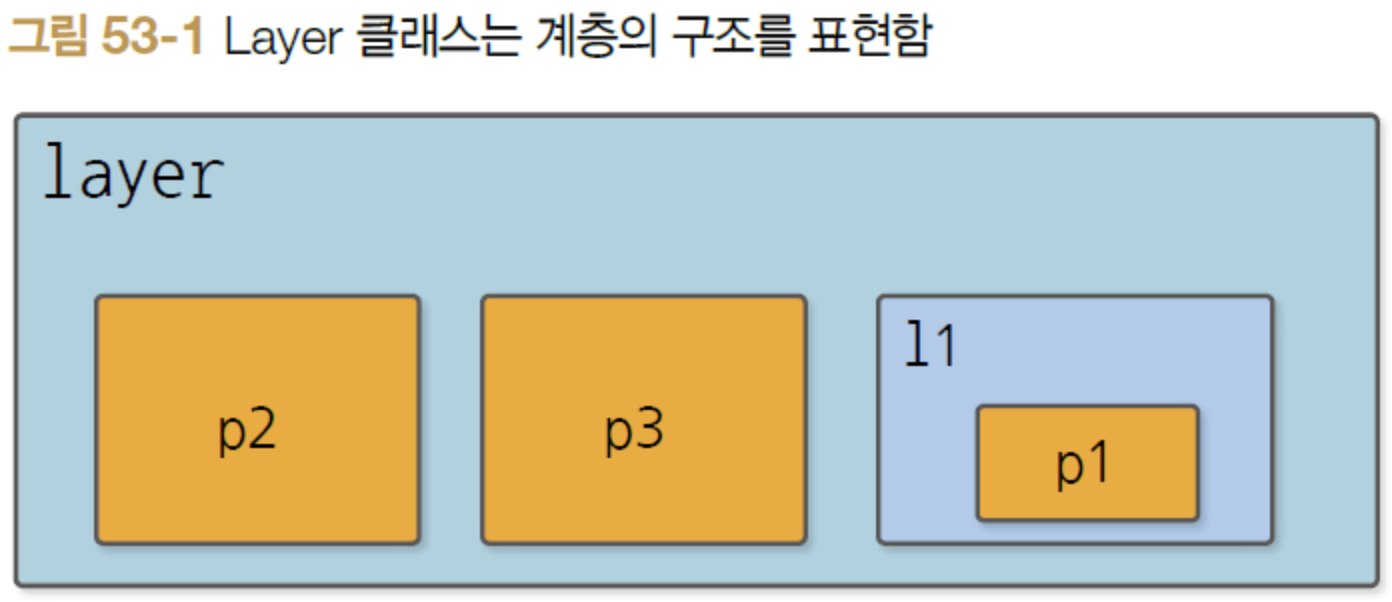

* 위 그림과 같이 같은 계층 구조로부터 Parameter를 '하나의 평탄한 딕셔너리'로, 즉 중첩되지 않은 딕셔너리로 뽑아내려면 어떻게 해야할까?
* 이를 위해 Layer 클래스에 _flatten_params 메서드에 추가한다.

In [ ]:
params_dict = {}
layer._flatten_params(params_dict)
print(params_dict)

* params_dict = {}로 딕셔너리를 만들어 layer._flatten_params(params_dict)로 건네준다.
* 그러면 layer에 포함된 매개변수가 '평탄화'되어 나온다.
* 출력결과를 보면 l1 계층 안의 매개변수 p1은 l1/p1이라는 키로 저장되어 있음을 알수 있다.

In [ ]:
   def _flatten_params(self, params_dict, parent_key=""):
        for name in self._params:
            obj = self.__dict__[name]
            key = parent_key + '/' + name if parent_key else name

            if isinstance(obj, Layer):
                obj._flatten_params(params_dict, key)
            else:
                params_dict[key] = obj

* 이 메서드는 인수로 딕셔너리인 params_dict와 텍스트인 parent_key를 받는다.
* 참고로 Layer 클래스의 인스턴스 변수인 _params에는 'Parameter의 인스턴스 변수 이름' 또는 'Layer의 인스턴스 변수이름'이 담겨 있다.
* 따라서 실체 객체는 obj = self.__dict__[name]으로 꺼내야한다.
* 그리고 꺼낸 obj가 Layer라면 obj의 __flatten_params 메서드를 호출한다.

Layer 클래스의 save 함수와 load 함수

* Layer 클래스의 매개변수를 외부 파일로 저장할 준비가 되어있다.

In [ ]:
    def save_weights(self, path):
            self.to_cpu()

            params_dict = {}
            self._flatten_params(params_dict)
            array_dict = {key: param.data for key, param in params_dict.items()
                          if param is not None}
            try:
                np.savez_compressed(path, **array_dict)
            except (Exception, KeyboardInterrupt) as e:
                if os.path.exists(path):
                    os.remove(path)
                raise

    def load_weights(self, path):
        npz = np.load(path)
        params_dict = {}
        self._flatten_params(params_dict)
        for key, param in params_dict.items():
            param.data = npz[key]

* save_weight 메서드는 먼저 self.to_cpu()를 호출하여 데이터가 메인 메모리에 존재함을 (데이터가 넘파이 ndaray임을) 보장한다.
* 그리고 ndarray 인스턴스를 값으로 갖는 딕셔너리 array_dict를 만든다.
* 그런 다음 np.savez_compressed 함수를 호출하여 데이터를 외부 파일로 저장한다.
* 한편 load_weight 메서드는 np.load 함수로 데이터를 읽어 들인 후 대응하는 키 데이터를 매개변수로 설정한다.

* 앞의 코드에서 파일을 저장할 때 try 구문을 사용했다.
* 사용자에 의해 발생하는 ctrl + c 등의 키워드 인터럽트에 대비한 보호 코드이다.
* 이 try 구문 덕분에 저장 도중 인터럽트가 발생하면 파일은 삭제된다.

In [ ]:
import dezero
import dezero.functions as F
from dezero import optimizers
from dezero import DataLoader
from dezero.models import MLP


max_epoch = 3
batch_size = 100

train_set = dezero.datasets.MNIST(train=True)
train_loader = DataLoader(train_set, batch_size)
model = MLP((1000, 10))
optimizer = optimizers.SGD().setup(model)

# 매개변수 읽기
if os.path.exists('my_mlp.npz'):
    model.load_weights('my_mlp.npz') #2

for epoch in range(max_epoch):
    sum_loss = 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(t)

    print('epoch: {}, loss: {:.4f}'.format(
        epoch + 1, sum_loss / len(train_set)))

# 매개변수 저장하기
model.save_weights('my_mlp.npz') #1

* 이 코드를 처음 실행하면 언제나처럼 모델의 매개변수를 무작위로 초기화한 상태에서 학습을 시작한다.
* 마지막 줄에서 학습된 매개변수들이 저장된다.

* 그리고 다음번에 실행하면 my_mlp.npz 파일이 존재하므로 파일로부터 매개변수들을 읽어 들인다.

# step 54
드롭아웃과 테스트 모드

* 과대적합의 원인
  * 훈련 데이터가 적음
  * 모델의 표현력이 지나치게 높음

* 첫번째 원인은 데이터를 더 확보하거나 데이터 수를 인위적으로 데이터 확장을 이용하면 효과적이다.
* 두번째 원인은 가중치 감소, 드롭아웃, 배치 정규화등이 유효하다.
* 특히 드롭아웃은 간단하면서도 효과적이여서 실무에서 많이 사용된다.
* 그래서 이번 단계에서는 드롭아웃을 추가한다.

드롭아웃이란
* 뉴런을 임의로 삭제(비활성)하면서 학습하는 방법이다.
* 학습 시에는 은닉층 뉴런을 무작위로 골라 삭제한다.

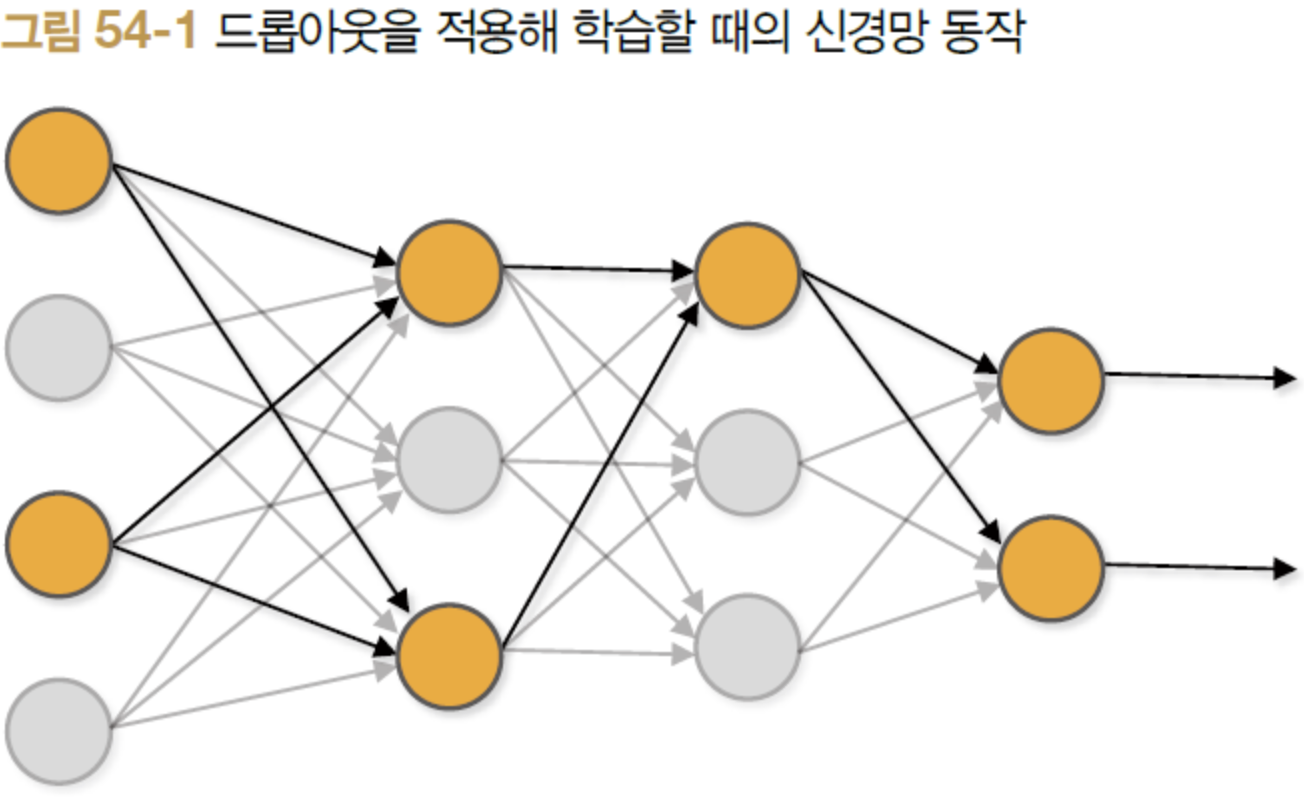

* 드롭아웃을 사용하면 학습 데이터를 흘려보낼 때마다 삭제할 뉴런을 무작위로 선택한다.
* 예를들어 10개의 뉴런으로 이루어진 층이 있고, 그다음 층에서 드롭아웃 계층을 사용하여 60%의 뉴런을 무작위로 삭제한다.


In [1]:
import numpy as np

dropout_ratio = 0.6
x = np.ones(10)

mask = np.random.rand(10) > dropout_ratio
y = x * mask

* 여기에서 mask는 원소가 True 혹은 False인 배열이다.
* 이 mask를 만드는 방법은 먼저 np.random.rand(10) 코드로 0.0 ~ 1.0 사이의 값을 임의로 10개 생성한다.
* 그런 다음 각 원소의 값을 dropout_ratio, 즉 0.6과 비교하여 dropout_ratio보다 큰 원소는 True이다.
* 이렇게 mask는 False의 비율이 평균적으로 60%가 될 것이다.

* mask를 만들었으면 y = x * mask를 실행한다.
* 이 코드는 mask에서 값이 False인 원소에 대응하는 x의 원소를 0으로 설정한다.(즉, 삭제한다.)
* 결과적으로 매회 평균 4개의 뉴런만이 출력을 다음 층으로 전달한다.
* 드롭아웃 계층은 학습 시 데이터를 흘려보낼 때마다 이와 같은 선별적 비활성화를 수행한다.


* 머신러닝에서는 앙상블 학습이 자주 사용된다.
* 앙상블 학습이란 여러 모델을 개별적으로 학습시킨 후 추론 시 모든 모델의 출력을 평균 내는 방법이다.
* 신경망으로 예를 들면 다섯 개의 동일한 구조의 신경망을 준비하고, 각각을 독립적으로 학습시킨다.
* 그런 다음 테스트할 때는 다섯 신경망이 출력한 값들의 평균을 '결과'로 낸다.
* 이렇게 하면 인식 정확도를 몇 %정도 향상시킬 수 있음이 실험적으로 알려져있다.
* 앙상블 학습은 드롭아웃과 가까운 관계이다.
* 드롭아웃은 학습 시 뉴런을 임의로 삭제하는데, 이를 매번 다른 모델을 학습하고 있다고 해석할 수 있기 떄문이다.

* 방금 전 코드는 드롭아웃의 학습 시 처리이다.
* 테스트 시에는 모든 뉴런을 사용하면서도 앙상블 학습처럼 동작하게끔 '흉내'내야 함
* 이를 위해 우선 모든 뉴런을 써서 출력을 계산하고, 그 결과를 '약화'시킨다.
* 약화하는 비율은 학습 시에 살아남은 뉴런의 비율이다.

In [2]:
# 학습 시
mask = np.random.rand(*x.shape) > dropout_ratio
y = x * mask

# 테스트 시
scale = 1 - dropout_ratio # 학습 시에 살아남은 뉴런의 비율
y = x * scale

* 이와 같이 테스트 시의 비율을 조절한다.
* 지금 예시에서는 학습할 때 평균 40%의 뉴런이 생존했기 때문에 테스트할 때는 모든 뉴런을 사용해 계산한 출력에 0.4를 곱했다. 이렇게 하여 학습시와 테스트 시의 비율을 일치 시킨다.
* 이상이 '일반적인 드롭아웃'이다. 여기서 '일반적'이라고 말한 데는 또 다른 형태로도 드롭아웃을 구현할 수 있기 때문이다.
* 바로 '역 드롭아웃'으로, 다음 절에서 설명한다.

역 드롭아웃

* 역 드롭아웃은 스케일 맞추기를 '학습할 때' 수행한다.
* 앞 절 마지막에서 스케일을 맞추기 위해 '테스트할 때' scale을 곱했다.
* 그래서 이번에는 학습할 때 미리 뉴런의 값에 1/scale을 곱해두고, 테스트 때는 아무런 동작도 하지 않는다.

In [3]:
# 학습 시
scale = 1 - dropout_ratio
mask = np.random.rand(*x.shape) > dropout_ratio
y = x * mask / scale

# 테스트 시
y = x

* 역 드롭아웃도 보통의 드롭아웃과 원리는 같지만, 나름의 장점이 있다.
* 테스트 시 아무런 처리도 하지 않기 때문에 테스트 속도가 살짝 향상한다.
* 추론 처리만을 이용하는 경우에 바람직한 특성이다.

* 또한 역 드롭아웃은 학습할때 dropout_ratio를 동적으로 변경할 수 있다.
* 예를들어 데이터를 첫번째 흘려보낼때 dropout_ratio을 0.43455로 한 후 다음번에는 0.56245로 변화를 줄 수 있다.
* 이에 반해 다이렉트 드롭 아웃에서는 dropout_ratio를 고정해두고 학습해야 한다.
* 만약 값을 중간에 바꾸면 테스트 시의 동작과 어긋나게 된다.
* 이러한 이점 때문에 많은 딥러닝 프레임워크에서 역 드롭아웃 방식을 채용하고 있다.

테스트 모드 추가

* 드롭아웃을 사용하려면 학습 단계인지 테스트 단계인지 구분해야한다.
* 이런 용도로는 18단계에서 만든 역전파 비활성화 모드 방식을 유용하게 활용할 수 있다.

In [ ]:
class Config:
    enable_backprop = True
    train = True

@contextlib.contextmanager
def using_config(name, value):
    old_value = getattr(Config, name)
    setattr(Config, name, value)
    try:
        yield
    finally:
        setattr(Config, name, old_value)

def test_mode():
    return using_config("train", False)

* 이와 같이 Config 클래스에 train이라는 클래스 변수를 추가한다.
* train의 값은 기본적으로 True이다.
* 그 다음으로 test_mode 함수를 추가한다.
* 이 함수를 with 문과 함께 사용하면 with 블록안에서만 Config.train이 False로 전환된다.
* 이 함수는 사용자도 사용한다.

드롭아웃 구현

In [5]:
def dropout(x, dropout_ratio=0.5):
    x = as_variable(x)

    if dezero.Config.train:
        xp = cuda.get_array_module(x)
        mask = xp.random.rand(*x.shape) > dropout_ratio
        scale = xp.array(1.0 - dropout_ratio).astype(x.dtype)
        y = x * mask / scale
        return y
    else:
        return x

* x는 Variable 인스턴스 또는 ndarray 인스턴스이다.
* 쿠파이의 ndarray 인스턴스인 경우도 고려하여 xp = cuda.get_array_module(x)에서 적절한 모듈을 가져온다.

In [7]:
import numpy as np
from dezero import test_mode
import dezero.functions as F

x = np.ones(5)
print(x)

# 학습 시
y = F.dropout(x)
print(y)

# 테스트 시
with test_mode():
    y = F.dropout(x)
    print(y)

[1. 1. 1. 1. 1.]
variable([2. 2. 2. 0. 0.])
variable([1. 1. 1. 1. 1.])


/content/dl-from-scratch-3/dezero/datasets.py:305: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  return fine_labels if label_type is "fine" else coarse_labels
